In [85]:
# load the queso prior and posterior
import numpy as np
from numpy.random import randn
import matplotlib
import matplotlib.pyplot as plt

post = np.loadtxt('fp_p_seq_1_exp_0.m')
post_the_0 = post[:,0]
post_the_1 = post[:,1]
#post.shape

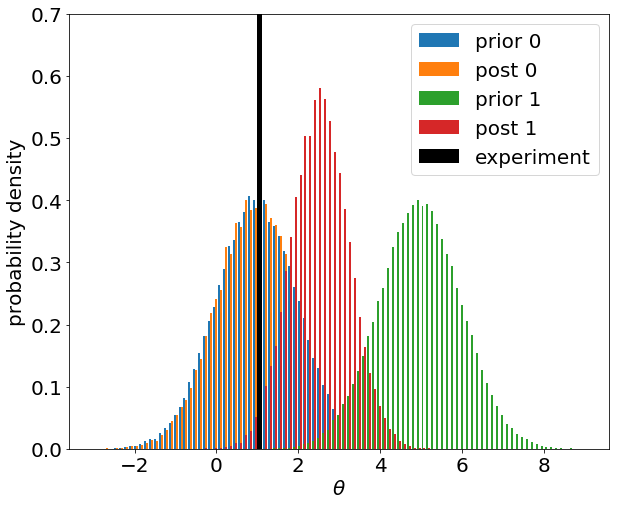

<Figure size 864x576 with 0 Axes>

In [86]:
# Sample the gaussian prior for theta0 and theta1

pri_the_0 = randn(len(post)) + 1
pri_the_1 = randn(len(post)) + 5
pri_the_0.shape

plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize=(10,8))
bins = np.linspace(-3, 9, 100) #(-3, 9, 100)
(density0,bins0,pathces0)=ax.hist([pri_the_0,post_the_0],bins,label=['prior 0','post 0'],density=True)
(density1,bins1,pathces1)=ax.hist([pri_the_1,post_the_1],bins,label=['prior 1','post 1'],density=True)
p3 = ax.hist(np.array([1.0]),bins,label=['experiment'],facecolor='k',density=True)
params = {'mathtext.default': 'regular' } 
ax.set_ylim([0.0,0.7])
ax.set_xlabel(r'$\theta$')
ax.set_ylabel('probability density')
plt.gca().legend()
plt.figure(figsize=(12,8))
fig.subplots_adjust(left=0.15)
ax.autoscale_view()
fig.savefig('pri_post_base_hist.png',dpi=100)

In [87]:
density0[0].shape

(99,)

In [88]:
#density contains the p(theta|y_0^*=1) in density[1] and the prior p(N(1,1)) in density[0].  The probabilities p
#are in the same bin locations so a summation can be performed.
#Make sure density1 or density0 match fp_p_seq_1_exp_# or fp_p_seq_0_exp_#, respectively.
prior = np.asarray(density1[0])
post = np.asarray(density1[1])
KL = np.nan_to_num(post*np.log(post/prior))  #remove negative and invert prior/post in the log when 
#getting infinity.  Mathematically they are equivalent but if a zero is in the denominator result goes to infinity.
KL[KL>1E300] = 0  #There are regions of no overlap where infinities will be encountered.  These are not added
#to the KL divergence.
#print(KL)
KL = np.sum(KL)
print(KL)

#Gaussian analytical formula
mean_pri = np.mean(prior)
std_pri = np.std(prior)
mean_post = np.mean(post)
std_post = np.std(post)

KL_ana = 0.5 * (np.log(std_pri**2/std_post**2) + 
            std_post**2/std_pri**2 + (mean_post-mean_pri)**2
            /std_pri**2 - 1)
#0.5 * (log(sigq^2/sigp^2) + sigp^2/sigq^2 + (mup-muq)^2/sigq^2 - 1)
print(KL_ana)


26.162218981411286
0.06365160323508079


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
